# Problem Statement 

This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared error and finally submitting the predictions in the given template.

## Columns Description

* Trip_distance: The elapsed trip distance in miles reported by the taximeter.

* Rate_code: The final rate code is in effect at the end of the trip. 1= Standard rate,2=JFK,3=Newark, 4=Nassau or                        Westchester, 5=Negotiated fare,6=Group ride

* Storeandfwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending it to the vendor                      and determines if the trip was stored in the server and forwarded to the vendor. Y= store and forward                       trip N= not a store and forward trip

* Payment_type: A numeric code signifying how the passenger paid for the trip. 1= Credit card,2= Cash, 3= No charge, 4=                      Dispute, 5= Unknown, 6= Voided trip

* Fare_amount: The time-and-distance fare calculated by the meter

* Extra: Miscellaneous extras and surcharges.

* Mta_tax: $0.50 MTA tax that is automatically triggered based on the metered rate in use.

* Tip_amount: Tip amount credited to the driver for credit card transactions.

* Tolls_amount: Total amount of all tolls paid in the trip.

* Imp_surcharge: $0.30 extra charges added automatically to all rides

* Total_amount: The total amount charged to passengers. Does not include cash tips

* Pickuplocationid: TLC Taxi Zone in which the taximeter was engaged

* Dropofflocationid: TLC Taxi Zone in which the taximeter was disengaged

* Year: The year in which the taxi trip was taken.

* Month: The month on which the taxi trip was taken.

* Day: The day on which the taxi trip was taken.

* Day_of_week: The day of the week on which the taxi trip was taken

* Hour_of_day: Used to determine the hour of the day in 24 hours format

* Trip_duration: The total duration of the trip in seconds

* calculated_total_amount: The total amount the customer has to pay for the taxi.

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Read datasets

In [3]:
train = pd.read_csv(r"D:\case_studies(eda)\taxi price prediction\train.csv")
display(train.head())
train.shape

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


(35000, 20)

In [4]:
test = pd.read_csv(r"D:\case_studies(eda)\taxi price prediction\test.csv")
display(test.head())
test.shape

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0


(15000, 19)

In [5]:
submission = pd.read_csv(r"D:\case_studies(eda)\taxi price prediction\submission.csv")
display(submission.head())
submission.shape

,calculated_total_amount
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


(15000, 1)

# Combining train and test dataset

In [6]:
combined = pd.concat([train, test], ignore_index = True)
combined.shape

(50000, 20)

In [7]:
# Checking variable type :-

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            50000 non-null  float64
 1   rate_code                50000 non-null  int64  
 2   store_and_fwd_flag       50000 non-null  object 
 3   payment_type             50000 non-null  int64  
 4   fare_amount              50000 non-null  float64
 5   extra                    50000 non-null  float64
 6   mta_tax                  50000 non-null  float64
 7   tip_amount               50000 non-null  float64
 8   tolls_amount             50000 non-null  float64
 9   imp_surcharge            50000 non-null  float64
 10  total_amount             50000 non-null  float64
 11  pickup_location_id       50000 non-null  int64  
 12  dropoff_location_id      50000 non-null  int64  
 13  year                     50000 non-null  int64  
 14  month                 

### Seprating numerical and categorical columns :-


In [8]:
combined.select_dtypes(include = np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [9]:
combined.select_dtypes(include = 'object').columns

Index(['store_and_fwd_flag'], dtype='object')

# Univariate Analysis

### For numerical columns

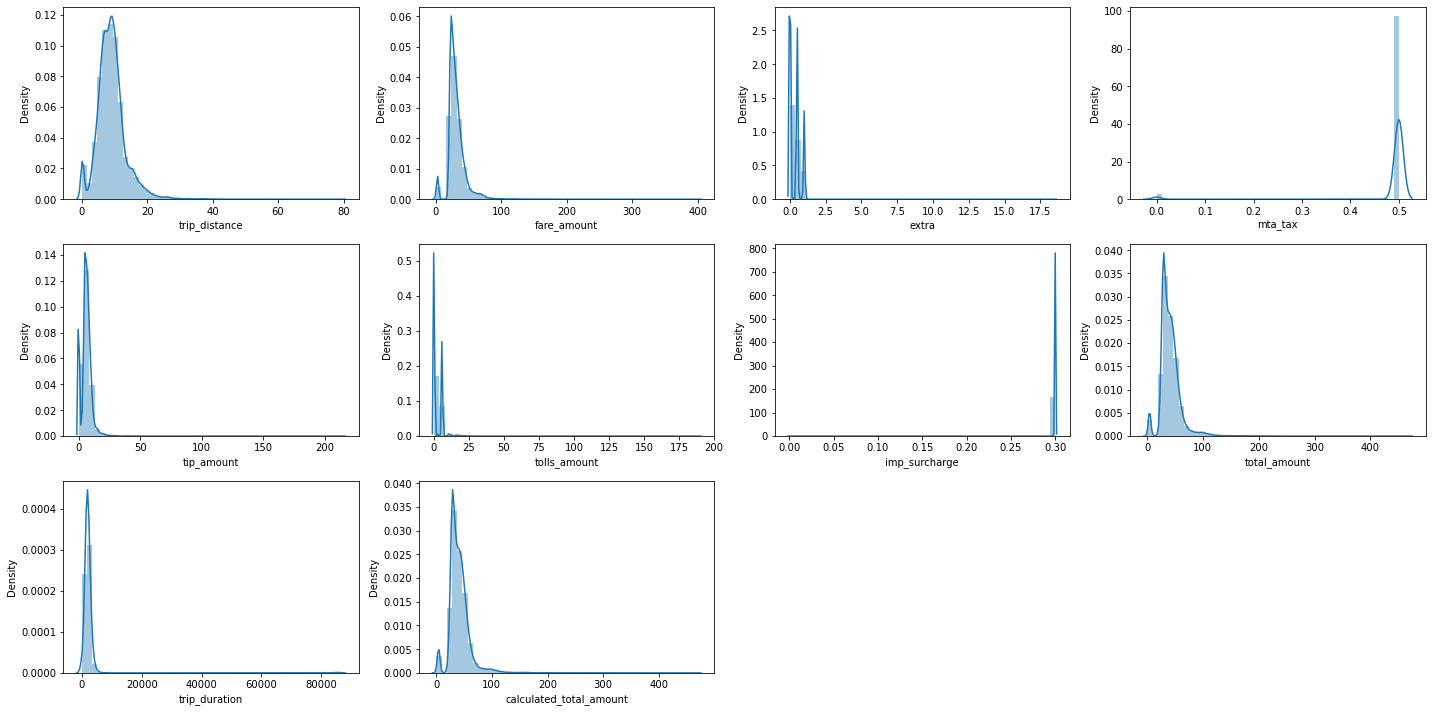

In [10]:
numeric_cols = ['trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration',
       'calculated_total_amount']

nrows = 3
ncols =4
iterator = 1

plt.figure(figsize = (20,10))
for i in numeric_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:,i])
    iterator+=1
plt.tight_layout() 
plt.show()

## Inferences
* Almost all the features are right skewed

### Checking the correlation between the numerical variables

<AxesSubplot:>

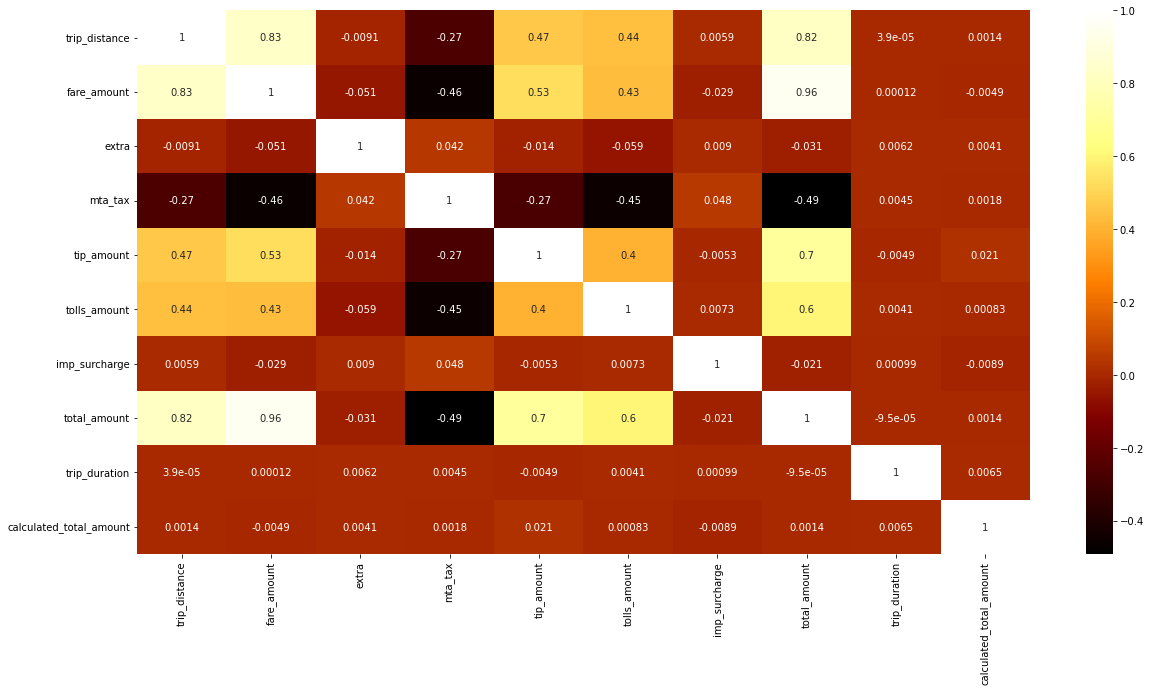

In [11]:
plt.figure(figsize = (20,10))

sns.heatmap(combined.loc[:, numeric_cols].corr(), annot = True, cmap = 'afmhot')

## Inferences
* Features with dark shade has good relation with target variable

### For categorical columns

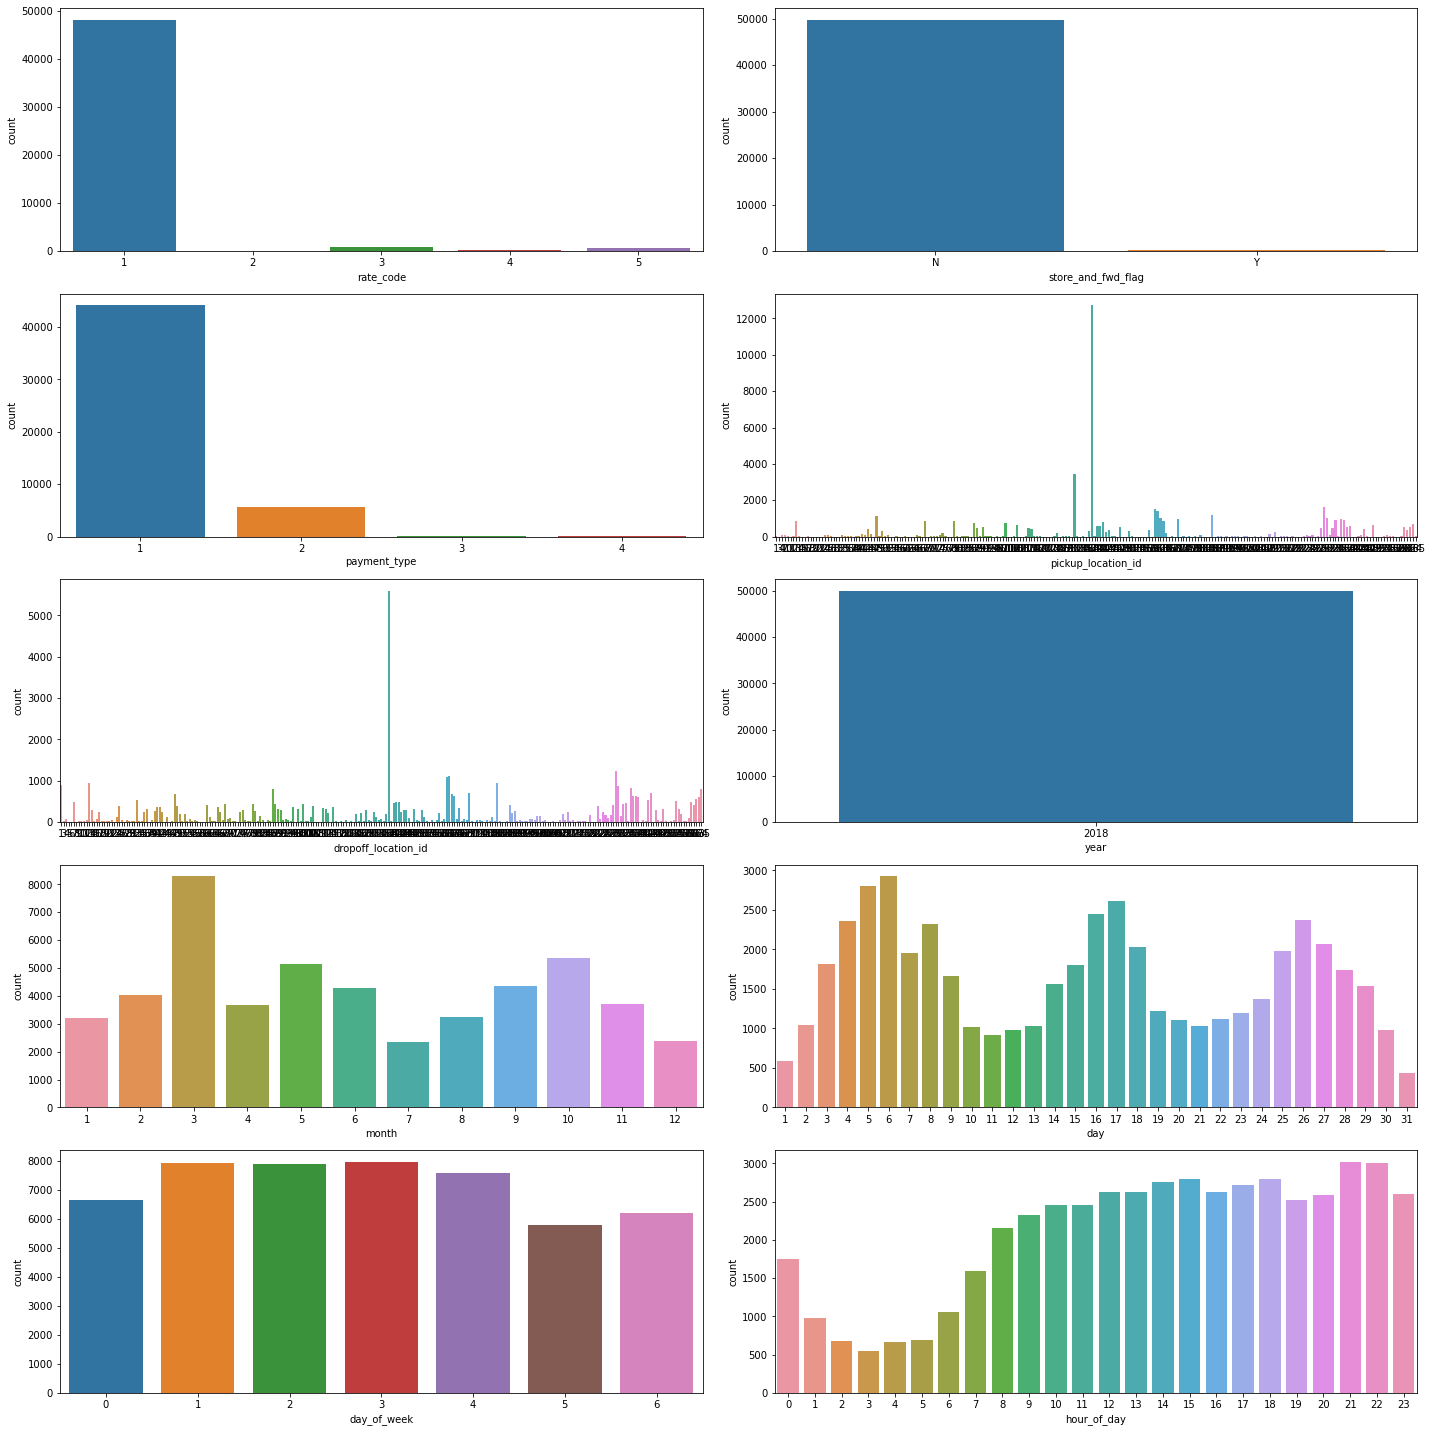

In [12]:
cat_cols = ['rate_code', 'store_and_fwd_flag', 'payment_type', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day']


nrows = 5
ncols =2
iterator = 1

plt.figure(figsize = (20,20))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined.loc[:,i])
    iterator+=1
plt.tight_layout() 
plt.show()

## Inferences
* 1 rate_code means standard rate is highest.
* Month 3 is the busiest.
* Credit-card is most used payment_type.

## Let's make a base model and submit it 

In [13]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount'],
      dtype='object')

In [14]:
submission['calculated_total_amount'] = train.calculated_total_amount.mean()

In [15]:
submission.to_csv('Basemodel_taxifare.csv', index =False)  


## *After submmitting we are getting our  RMSE score is 19.08.

## Bivariate Analysis

### Numerical vs Numerical(Target)

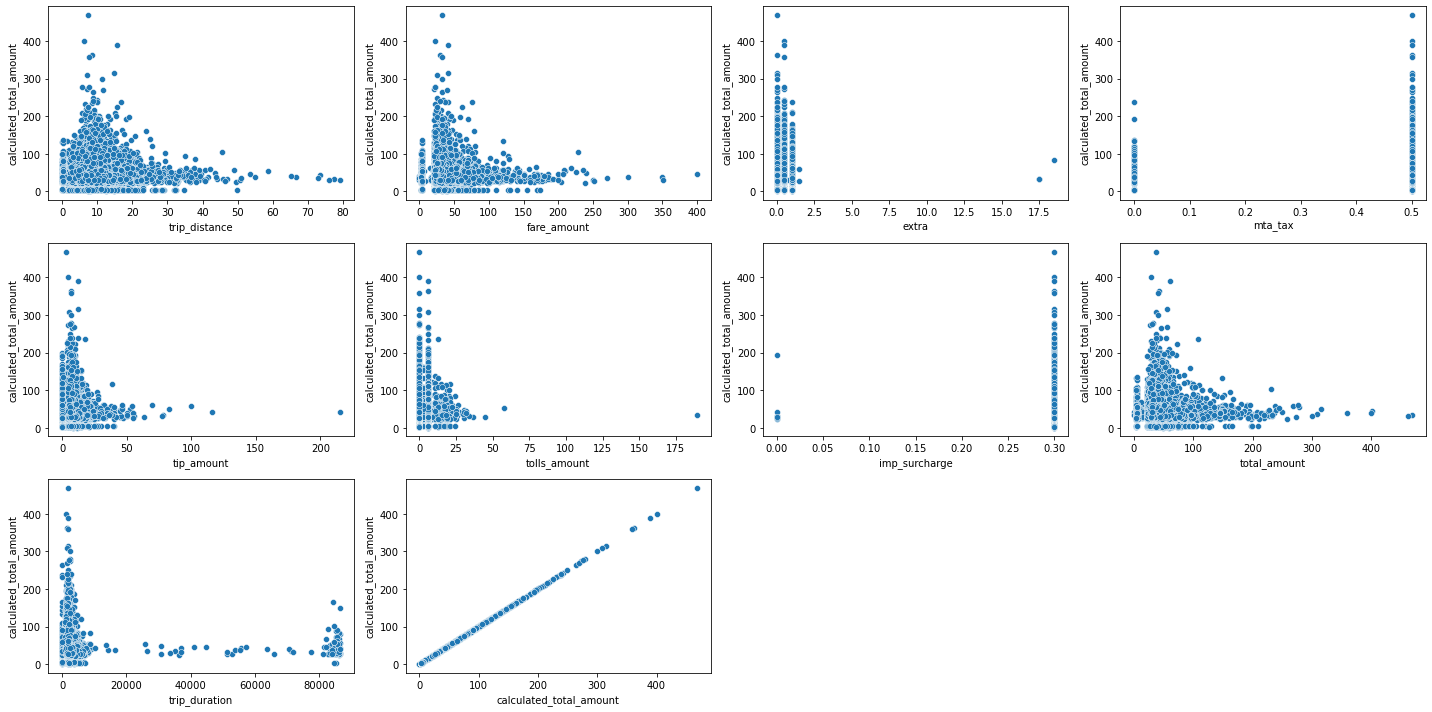

In [16]:
numeric_cols = ['trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration',
       'calculated_total_amount']

nrows = 3
ncols =4
iterator = 1

plt.figure(figsize = (20,10))
for i in numeric_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(combined.loc[:,i], combined.calculated_total_amount)
    iterator+=1
plt.tight_layout() 
plt.show()

## Inferences 


#### Note :- We will have to remove the outliers from the data to get better inferences

### Categorical vs Numerica(Target)

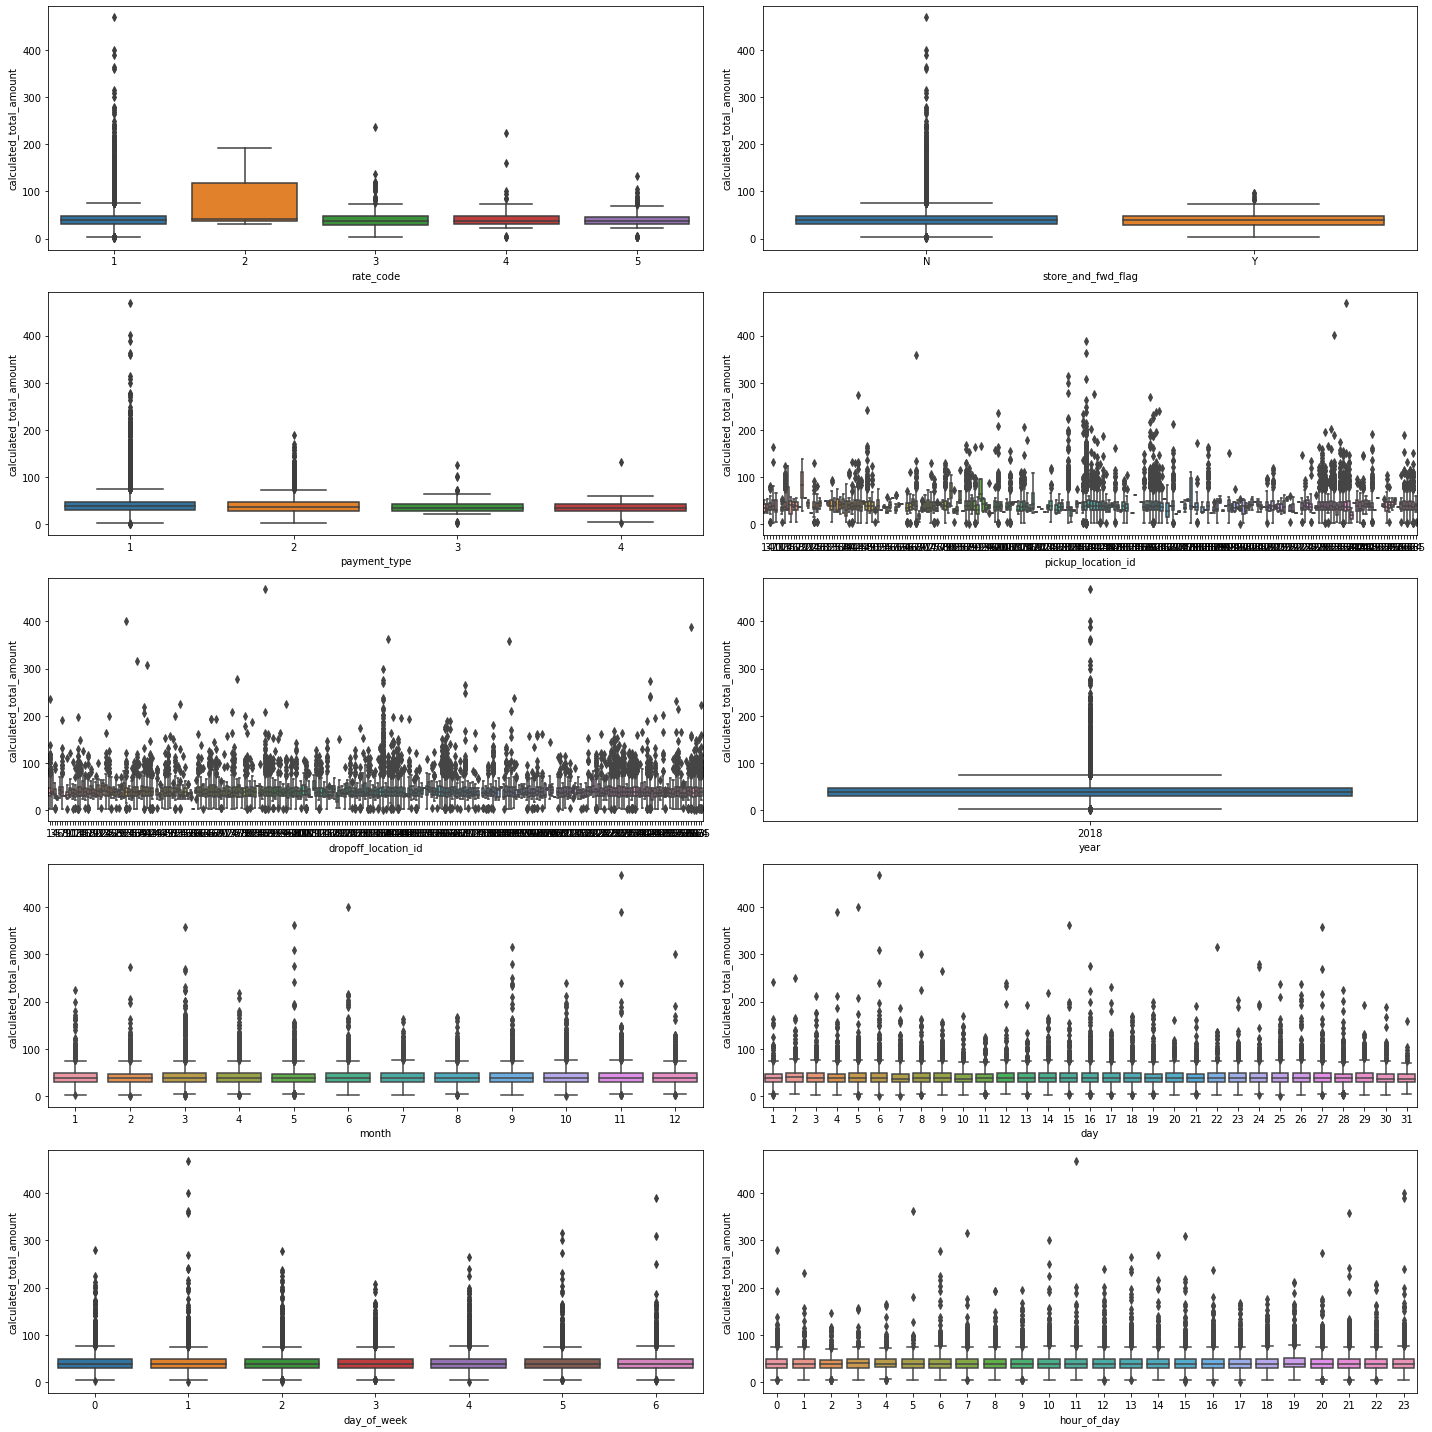

In [17]:
cat_cols = ['rate_code', 'store_and_fwd_flag', 'payment_type', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day']


nrows = 5
ncols =2
iterator = 1

plt.figure(figsize = (20,20))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined.loc[:,i], combined.calculated_total_amount)
    iterator+=1
plt.tight_layout() 
plt.show()

## Inferences 
* Too many outliers present

## Checking for missing values if any

In [18]:
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

### Inferences
* We have no missing values in our dataset

# Feature Engineering

## 1.

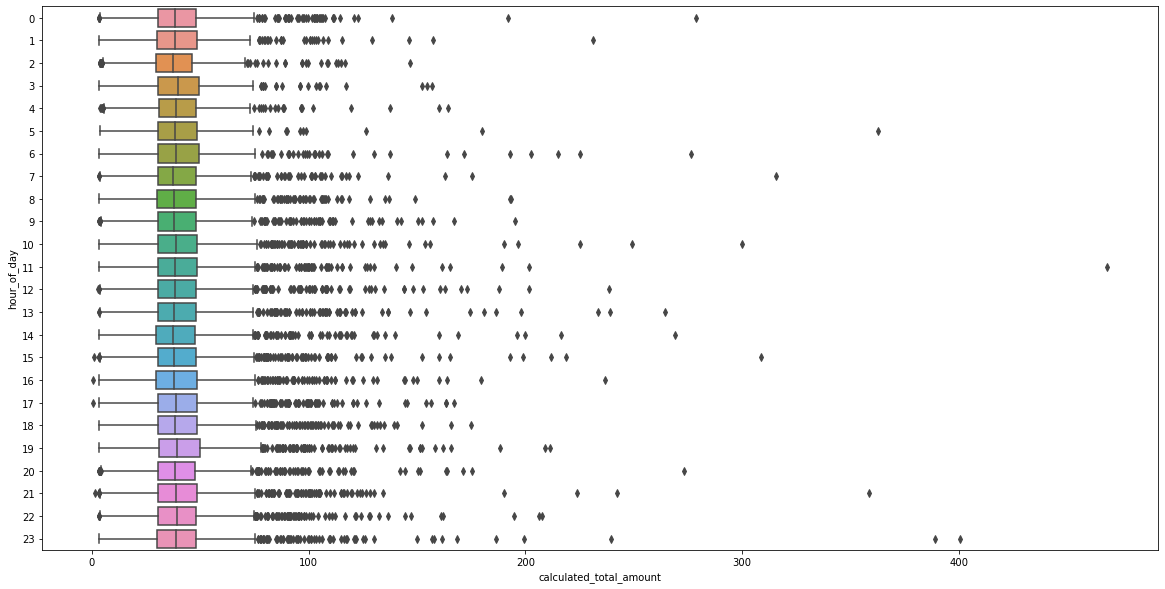

In [19]:
# Plotting hour of the day

plt.figure(figsize = (20,10))

sns.boxplot(y='hour_of_day', x = 'calculated_total_amount', data= combined, orient = 'h')
plt.show()

# Creating a new variable 'Peak_Hours'
* 5, 10, 11, 15, 16, 19, 20, 21, 22, 23 These hours are peak hour 

In [20]:
combined['peak_hours'] = combined.hour_of_day.apply(lambda x:1 if x in [5, 10, 11, 15, 16, 19, 20, 21, 22, 23] else 0)

<AxesSubplot:xlabel='peak_hours', ylabel='calculated_total_amount'>

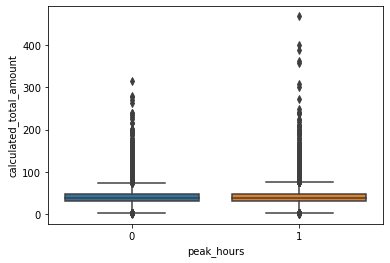

In [21]:
sns.boxplot( x = 'peak_hours', y= 'calculated_total_amount', data = combined)

# Clustering 

In [22]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Kmeans = KMeans(random_state = 42)

elbow = KElbowVisualizer(estimator = Kmeans, random_state = 42)

#  checking clusters for hour of the day, day of the week, month, day


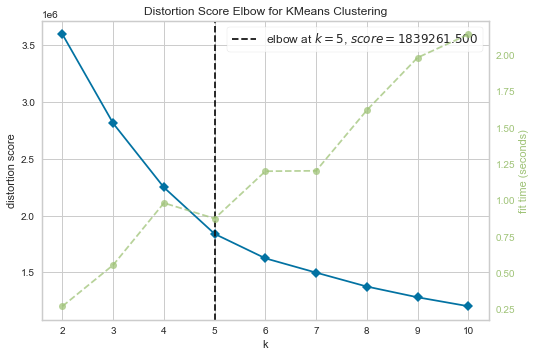

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:

data = combined.loc[:, ['month', 'day', 'day_of_week', 'hour_of_day']]

# Fit the elbow

elbow.fit(data)
elbow.show()   

## Inferences 
*  We got the number of clusters == 5

### Fitting the Clusters and generating the Labels

In [24]:
Kmeans = KMeans(n_clusters=5, random_state = 42)
labels = Kmeans.fit(data)

combined['cluster_labels'] = labels.labels_

In [25]:
combined['cluster_labels'].value_counts()

4    11149
0    10976
3     9962
1     8970
2     8943
Name: cluster_labels, dtype: int64

<AxesSubplot:xlabel='cluster_labels', ylabel='calculated_total_amount'>

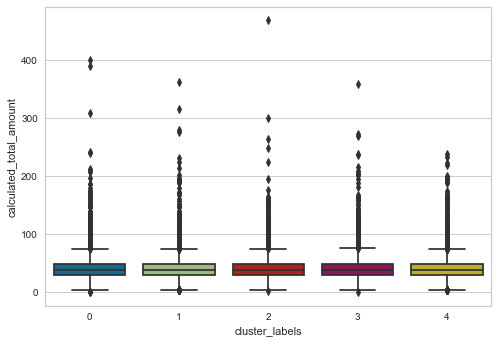

In [26]:
# plotting cluster label vs calculated total amount

sns.boxplot( x = 'cluster_labels', y= 'calculated_total_amount', data = combined)

### Let's check the clusters for lat. and long.

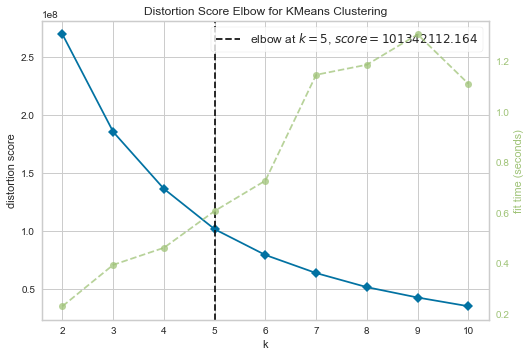

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
Kmeans = KMeans(random_state = 0)

elbow = KElbowVisualizer(estimator = Kmeans, random_state = 0)

data = combined.loc[:, ['pickup_location_id', 'dropoff_location_id']]

# Fit the elbow

elbow.fit(data)
elbow.show()   

## Inferences 
*  We got the number of clusters == 5

### Fitting the Clusters and generating the Labels

In [28]:
Kmeans = KMeans(n_clusters=5, random_state = 0)
labels = Kmeans.fit(data)

combined['geo_labels'] = labels.labels_

<AxesSubplot:xlabel='geo_labels', ylabel='calculated_total_amount'>

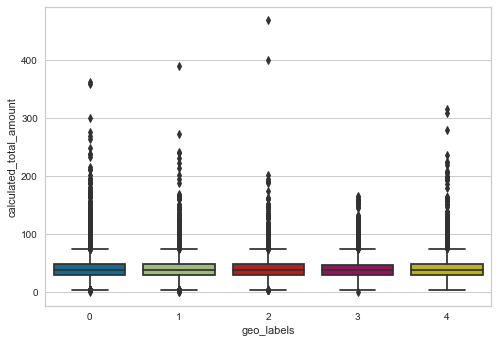

In [29]:
# plotting geo label vs calculated total amount

sns.boxplot( x = 'geo_labels', y= 'calculated_total_amount', data = combined)

### Inferences
* 138, 132, 230, 161, 162 These are our top TLC taxi zones, so by data mining we can get the region from these codes
* 138 - queens, 132-queens, 230- Manhattan, 161- Manhattan, 162 - Manhattan

In [30]:
# majority are from manhattan and queens so seprating both

manhattan_list = [4,12,13,24,41,42,43,45,48,50,68,74,75,79,87,88,90,100,103,104,105,107,113,114,116,120,125,127,128,137,140,141,142,143,144,148,151,152,153,158,161,162,163,164,166,170,186,194,202,209,211,224,229,230,231,232,233,234,236,237,238,239,243,244,246,249,261,262,263]
queens_list = [2,7,8,9,10,15,16,19,27,28,30,38,53,56,57,64,70,73,82,83,86,92,93,95,96,98,101,102,117,121,122,124,129,130,131,132,134,135,138,139,145,146,157,160,171,173,175,179,180,191,192,193,196,197,198,201,203,205,207,215,216,218,219,223,226,252,253,258,260]

In [31]:
# Making a function if location)id is present in above code then it will return manhattan else it will return queens

def locs(x):
    if x in manhattan_list:
        return('Manhattan')
    elif x in queens_list:
        return('Queens')
    else:
        return('Others')

In [32]:
combined['Location'] = combined.pickup_location_id.apply(locs)

### Inferences
* we can see that taxi's pickup location majorily is from region 'Manhttan' and 'Queens'
* So, we will make this in 3 categories of manhattan, queens and others

## Finding the number of Trips happened


In [33]:
# Finding no. of trips happened by pickup locatiob and drop off location
combined['trip_count'] = combined.groupby('pickup_location_id')['dropoff_location_id'].transform('nunique')

In [34]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'peak_hours',
       'cluster_labels', 'geo_labels', 'Location', 'trip_count'],
      dtype='object')

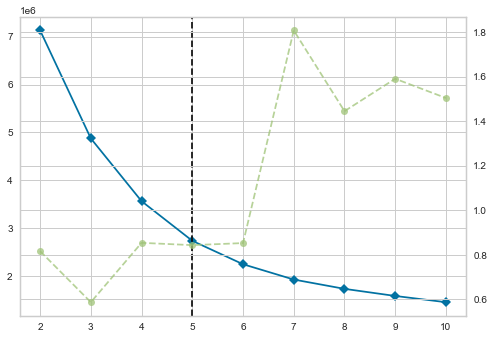

In [35]:
# Cluster centroid for fare amount....surchange..

Kmeans = KMeans(random_state = 42)
elbow = KElbowVisualizer(estimator = Kmeans, random_state = 42)

data = combined.loc[:, ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge']]

elbow.fit(data)
plt.show()

In [36]:
# Fit the clusters == 3 and generating the centroids

Kmeans = KMeans(n_clusters=3, random_state = 42)

centres = Kmeans.fit(data)
combined['fare_centres'] = centres.labels_

## Applying statistical tests

In [37]:
import statsmodels.formula.api as sfa

model = sfa.ols('calculated_total_amount~fare_centres', data = combined).fit()

In [38]:
from statsmodels.stats.anova import anova_lm
print(anova_lm(model))

                   df        sum_sq     mean_sq         F    PR(>F)
fare_centres      1.0  1.497978e+02  149.797791  0.407744  0.523121
Residual      34998.0  1.285763e+07  367.381750       NaN       NaN


## Inferences
* Our pvalue > alpha ...> we fail to reject our null hypothesis
* so we can say that this new feature 'fare_centres' is not a good feature for our target.

## Making new feature  'Fare per mile'

In [39]:

combined['fare_per_mile'] = combined['total_amount']/combined['trip_distance']

## Finding new columns on basis of per day

In [40]:
# median fare per day

combined['med_fare_pd'] = combined.groupby('day')['total_amount'].transform('median')

In [41]:
# standard deviation fare per day

combined['std_fare_pd'] = combined.groupby('day')['total_amount'].transform('std')

In [42]:
# min fare per day

combined['min_fare_pd'] = combined.groupby('day')['total_amount'].transform('min')

In [43]:
# max fare per day

combined['max_fare_pd'] = combined.groupby('day')['total_amount'].transform('max')

## Finding new columns on basis of  per month

In [44]:
# median Fare per month
combined['med_fare_month'] = combined.groupby('day')['total_amount'].transform('median')

# # standard deviation fare per month

combined['std_fare_month'] = combined.groupby('day')['total_amount'].transform('std')

# min fare per month

combined['min_fare_month'] = combined.groupby('day')['total_amount'].transform('min')

# max fare per month

combined['max_fare_month'] = combined.groupby('day')['total_amount'].transform('max')


In [45]:
# Displaying dataset

combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,...,fare_centres,fare_per_mile,med_fare_pd,std_fare_pd,min_fare_pd,max_fare_pd,med_fare_month,std_fare_month,min_fare_month,max_fare_month
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,...,1,4.517203,37.30,22.624294,3.30,389.12,37.30,22.624294,3.30,389.12
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,...,1,22.750000,41.58,17.755548,3.96,227.30,41.58,17.755548,3.96,227.30
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,...,0,5.976166,39.07,17.623236,3.30,174.30,39.07,17.623236,3.30,174.30
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,...,1,4.874737,41.58,17.755548,3.96,227.30,41.58,17.755548,3.96,227.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,...,1,4.717241,36.00,19.530189,3.30,266.56,36.00,19.530189,3.30,266.56


## Dropping columns

In [46]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'peak_hours',
       'cluster_labels', 'geo_labels', 'Location', 'trip_count',
       'fare_centres', 'fare_per_mile', 'med_fare_pd', 'std_fare_pd',
       'min_fare_pd', 'max_fare_pd', 'med_fare_month', 'std_fare_month',
       'min_fare_month', 'max_fare_month'],
      dtype='object')

In [47]:
newdata = combined.drop(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day'], axis = 1)

In [48]:
# Factorize the store_and_fwd_flag

newdata['store_and_fwd_flag'] = pd.factorize(newdata.store_and_fwd_flag)[0]

## Split the data in train and test

In [49]:
newtrain = newdata.loc[0: train.shape[0]-1, ]
newtest = newdata.loc[train.shape[0]:, ]

In [50]:
# Checking shape of train and test

newtrain.shape , newtest.shape

((35000, 22), (15000, 22))

## Removing Target from test

In [51]:
newtest.drop('calculated_total_amount', axis = 1, inplace = True)

## Removing the outliers from the data


In [52]:
q1 = combined.quantile(0.25)
q2 = combined.quantile(0.50)
q3 = combined.quantile(0.75)

IQR = q3 - q1

lower_lim = q1 - 1.5*IQR
upper_lim = q3 + 1.5*IQR

In [53]:
wt_outliers = newtrain.loc[~((newtrain < lower_lim) | (newtrain > upper_lim)).any(axis = 1)]

In [54]:
# Split data in X and y

X = wt_outliers.drop('calculated_total_amount', axis = 1)
y = wt_outliers.calculated_total_amount

In [55]:
X = pd.get_dummies(X, drop_first = True)
newtest = pd.get_dummies(newtest, drop_first = True)

# Applying models

## Importing libraries

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostClassifier

In [74]:
# Base Models
def base_models():
    models = dict()
    models["LR"] = LinearRegression()
    models["Dtree"] = DecisionTreeRegressor()
    models["RF"] = RandomForestRegressor()
    models["GBM"] = GradientBoostingRegressor()
    models["XGB"] = XGBRegressor()
    models["lgbm"] = LGBMRegressor()
    return models

In [75]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import KFold

In [76]:
from sklearn.model_selection import cross_val_score, KFold

def eval_models(model):
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    score = -cross_val_score(estimator = model, X = X, y= y, cv = cv,
                            scoring = "neg_root_mean_squared_error",
                            error_score= "raise", n_jobs = -1)
    return(score)

## Build the Models...

In [61]:
from sklearn.linear_model import LinearRegression

In [78]:
# Build the Models....

models = base_models()
result, names = list(), list()
for name, model in models.items():
    finalscore = eval_models(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'% (name, np.mean(result), np.std(result)))

## Whichever model is giving best score we will apply those models seperately and submit       it and we will check RMSE score 

In [ ]:
# Lets start with XGBOOST

lr = LinearRegression()
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

pred_lr = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lr.append(lr.fit(xtrain, ytrain).predict(newtest))

In [ ]:
pred = pd.DataFrame(pred_lr).T.mean(axis = 1)
pred

In [ ]:
submission['calculated_total_amount'] = pred
submission.to_csv('LRmodel.csv', index = False)
# After submission our score is  # 21.41

In [ ]:
# Lets start with LGBM
lr = LGBMRegressor()
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

pred_lr = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lr.append(lr.fit(xtrain, ytrain).predict(newtest))
    

pred = pd.DataFrame(pred_lr).T.mean(axis = 1) 
submission["calculated_total_amount"] = pred
submission.to_csv("LGBRMODELS.CSV", index = False)

# After submission our score is # 19.33